# Import Modul 

In [56]:
!pip install category_encoders

In [128]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.svm import LinearSVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, ward, average, complete


from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [60]:
from google.colab import files
upload = files.upload()

Saving hotel_bookings.csv to hotel_bookings (2).csv


In [144]:
hotel = pd.read_csv('hotel_bookings (2).csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [130]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# EDA

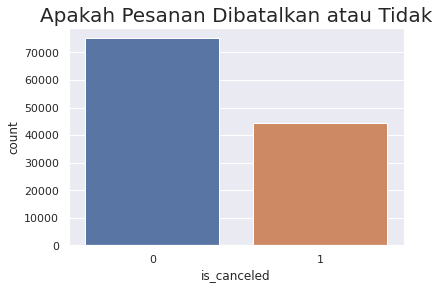

In [131]:
# Melihat banyaknya pesanan yang dibatalkan
sns.set(style = "darkgrid")
plt.title("Apakah Pesanan Dibatalkan atau Tidak", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", data = hotel)

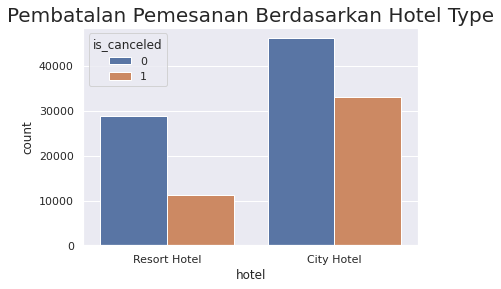

In [134]:
# Banyaknya Pemesanan Dibatalkan Berdasarkan Hotel Type?
sns.set(style = "darkgrid")
plt.title("Pembatalan Pemesanan Berdasarkan Hotel Type", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = hotel)

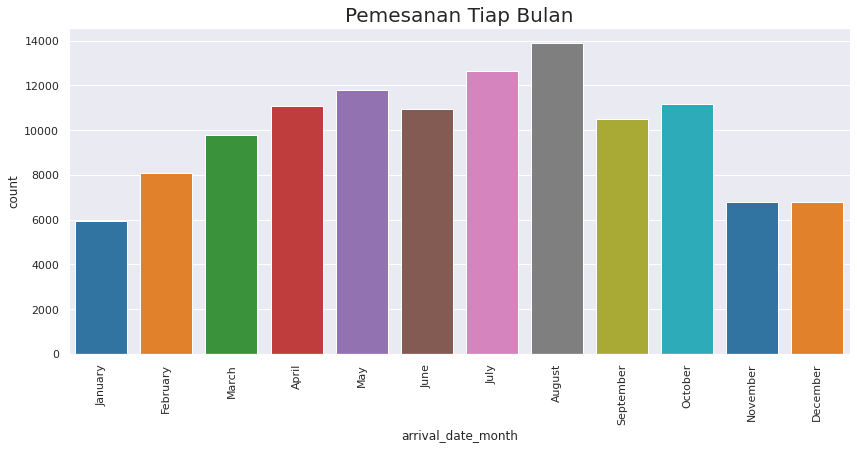

In [135]:
# Bulan Yang Memiliki Angka Pemesanan Tertinggi?
bulan = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,6))
plt.title("Pemesanan Tiap Bulan", fontdict = {'fontsize': 20})
sns.countplot(hotel['arrival_date_month'], palette='tab10', order = bulan)
plt.xticks(rotation = 90)
plt.show()

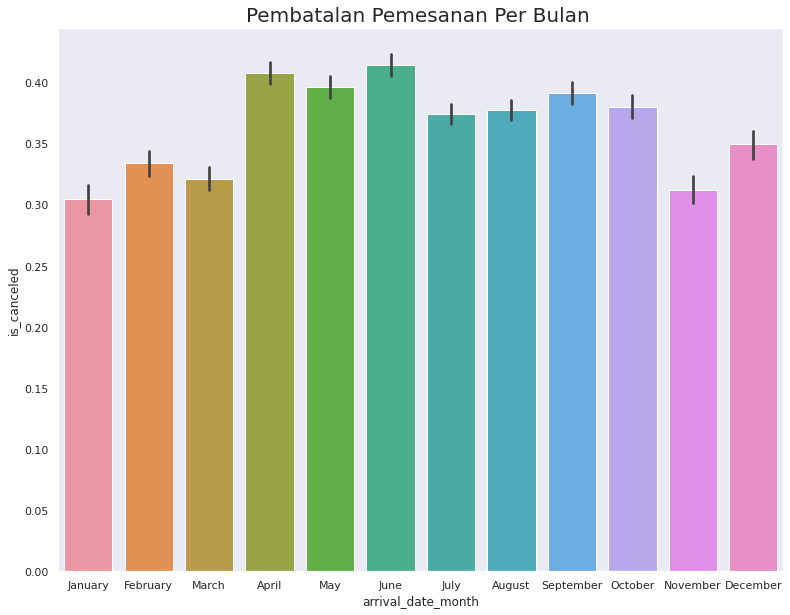

In [136]:
# Bulan Dengan Angka Pembatalan Pemesanan Tertinggi?
bulan = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize = (13,10))
sns.set(style="dark")
plt.title("Pembatalan Pemesanan Per Bulan ", fontdict={'fontsize': 20})
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = hotel, order = bulan);

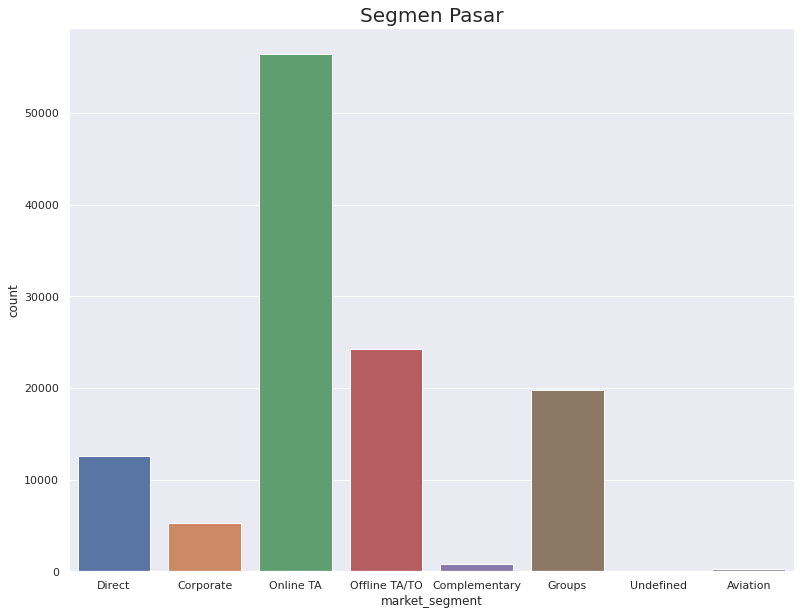

In [137]:
# Angka Pemesanan Berdasarkan Segmen Pasar
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Segmen Pasar", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", data = hotel)

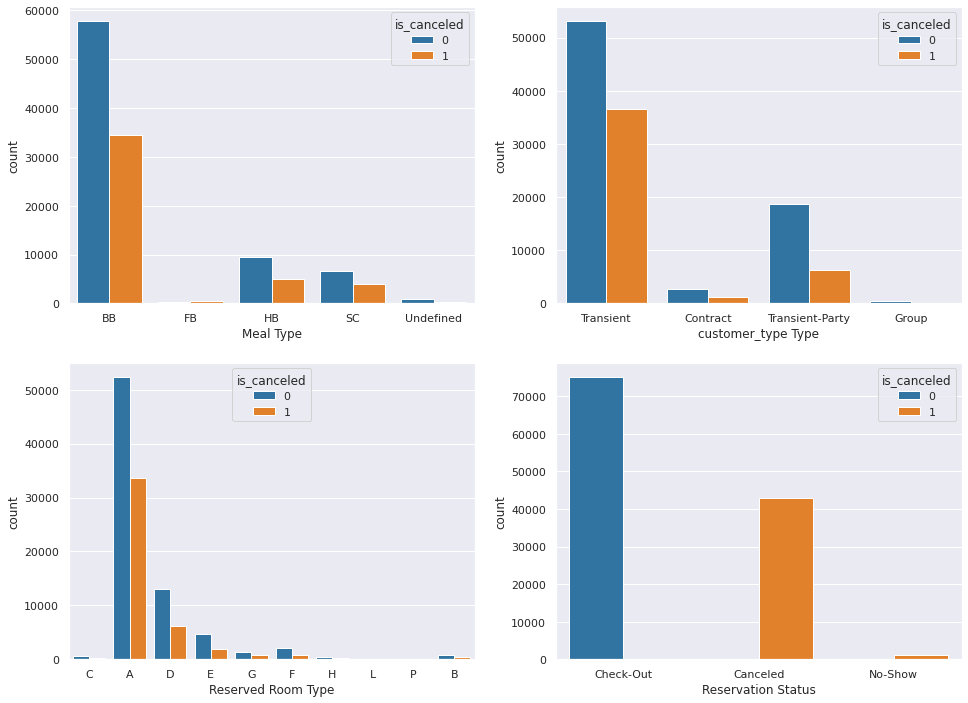

In [138]:
#Some subplot of remaining attributes:
plt.figure(figsize=(16,12))
sns.set(palette = "tab10")
plt.subplot(221)
sns.countplot(hotel['meal'], hue=hotel['is_canceled'])
plt.xlabel('Meal Type')
plt.subplot(222)
sns.countplot(hotel['customer_type'], hue=hotel['is_canceled'])
plt.xlabel('customer_type Type')
plt.subplot(223)
sns.countplot(hotel['reserved_room_type'], hue=hotel['is_canceled'])
plt.xlabel('Reserved Room Type')
plt.subplot(224)
sns.countplot(hotel['reservation_status'], hue=hotel['is_canceled'])
plt.xlabel('Reservation Status')
plt.show()

# Data Preparation

# Cleaning

In [145]:
# Cek missing values
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [146]:
# Mengatasi Missing values
hotel['children'].fillna(0,inplace=True)
hotel['country'].fillna('PRT',inplace=True)
hotel.drop(['agent','company'],axis=1,inplace=True)

In [147]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [148]:
hotel = hotel.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','reservation_status_date'], axis=1)
hotel = pd.concat([hotel, 
                 pd.get_dummies(hotel['hotel'], drop_first=True), 
                 pd.get_dummies(hotel['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(hotel['market_segment'], drop_first=True),
                 pd.get_dummies(hotel['distribution_channel'], drop_first=True),
                 pd.get_dummies(hotel['customer_type'], drop_first=True)
                 ], axis=1)
hotel = hotel.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

# Model Training

Split data jadi training dan test data

In [149]:
X = hotel.iloc[:, 1:].values
y = hotel.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X)
print(y)

[[3.420e+02 2.015e+03 2.700e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [7.370e+02 2.015e+03 2.700e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [7.000e+00 2.015e+03 2.700e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [3.400e+01 2.017e+03 3.500e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.090e+02 2.017e+03 3.500e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.050e+02 2.017e+03 3.500e+01 ... 0.000e+00 1.000e+00 0.000e+00]]
[0 0 0 ... 0 0 0]


Train atau fit data menggunakan K- Nearest Neighbors model

In [150]:
model_accuracy_results = {}

# Menghitung akurasi confusion matrix
def model_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    return accuracy

In [151]:
# Fit and train

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['KNearestNeighbors'] = model_accuracy(y_test, y_pred)

Train atau fit data menggunakan random forest classifier

In [152]:
# Fit and train
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

# Computing accuracy
model_accuracy_results['RandomForest'] = model_accuracy(y_test, y_pred)

Confusion Matrix:
[[17272  1360]
 [ 3017  8199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     18632
           1       0.86      0.73      0.79     11216

    accuracy                           0.85     29848
   macro avg       0.85      0.83      0.84     29848
weighted avg       0.85      0.85      0.85     29848



Membandingkan akurasi K-NN model dan Random Forest Classifier

In [153]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
KNearestNeighbors,76.63
RandomForest,85.34


# Conclusion

*   Fitur yang paling penting untuk memprediksi pembatalan pemesanan hotel adalah lead_time, deposit_type, arrival_day_date_of_month, country, arrival_date_year, adr, and market segment.
*   Di sini Algoritma Random Forest memiliki akurasi yang tinggi (85,34) untuk memprediksi pembatalan pemesanan hotel dibandingkan K-nearest Neighbor(81,44)
*   Pembatalan dan prediksinya adalah masalah nyata bagi industri pariwisata dan pemahaman yang baik untuk masalah ini dan fitur-fitur yang terkait akan sangat berguna untuk mengurangi risiko investasi industri penting ini.
